In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme()

In [41]:
breast_cancer=load_breast_cancer()
df=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
df=df[['mean area','mean compactness']]
y=pd.Categorical.from_codes(breast_cancer.target,breast_cancer.target_names)
y=pd.get_dummies(y,drop_first=True)

In [42]:
print(breast_cancer.feature_names)
print(breast_cancer.data)
print(df.head())

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
   mean area  mean compactness
0     

In [43]:
print(y)

     benign
0     False
1     False
2     False
3     False
4     False
..      ...
564   False
565   False
566   False
567   False
568    True

[569 rows x 1 columns]


In [44]:
X_train,X_test,y_train,y_test=train_test_split(df,y,random_state=1)

In [45]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [46]:
y_pred=knn.predict(X_test)
print(y_pred)
print(y_test)

[ True  True  True False False False False False  True False  True  True
 False  True  True  True  True  True  True False  True  True False  True
  True  True  True False False False False  True False  True  True  True
 False False  True  True  True  True  True  True  True False  True  True
 False False False False  True  True  True  True  True False False  True
  True  True  True  True  True  True  True False  True  True  True  True
  True False  True False False  True  True False  True False  True False
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True False  True  True  True
 False False  True  True False  True False False  True  True  True  True
  True False False  True  True False  True False False False  True False
  True False  True False False False  True  True False False  True]
     benign
421    True
47    False
292    True
186   False
414   False
..      ...
232    True
413    True
514   False
244   Fal

<Axes: xlabel='mean area', ylabel='mean compactness'>

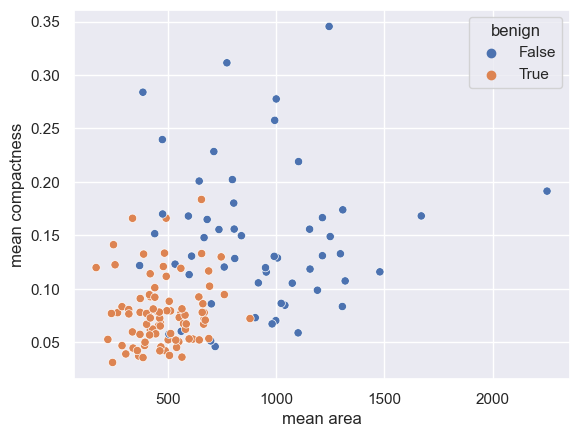

In [47]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test,how='outer')
)

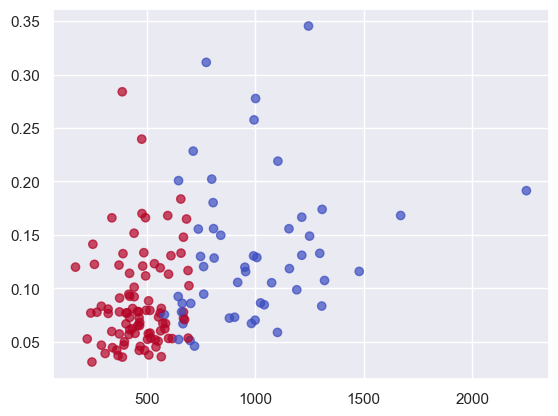

In [48]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [49]:
conf=confusion_matrix(y_test,y_pred)
print(conf)

[[42 13]
 [ 9 79]]
